<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management, Analysis and Security</h1>

<h2 align='center'> Lab 05 - Machine Learning - I</h2>

*****

In this lab, we will first guide you through some required interfaces of `sklearn` and then subsequently we will implement and study **Linear Regression** and **Nearest-Neighbours Regression**. So, first let us have a look at the package that we are going to use for this lab (and the next one too).


### Scikit-learn

The python package we will use for this lab and for all other Machine Learning exercises and assignment is **Scikit-learn**. It’s the standard python package used in academia for using off-the-shelf machine learning algorithms.

It comes pre-installed with our anaconda installation and is installed with the short name **sklearn**.

**Note**: To learn more about sklearn please visit the [official tutorials page](https://scikit-learn.org/stable/tutorial/index.html).


### Linear Regression

Linear Regression is the mostly commonly used machine learning algorithm that can be used for predicting real-world values like costs of houses, number of calls, total sales etc. Here, we establish a relationship between **dependent** and **independent** variables by fitting a _best line_. This line of best fit is known as **regression line** and is represented by the **linear equation**: 

\begin{equation*}
y = a \cdot x + b
\end{equation*}

where, 

`x = Independent Variable`, and

`y = Dependent Variable`

and `a` and `b` are the model parameters or coefficients:

`a = slope coefficient`, and

`b = intercept coefficient`

Given a dataset containing x and y, a linear regression can be used to:

* Build a predictive model to predict future values of **x<sub>i</sub>** without a **y** value.
* Model the strength of the relationship between each dependent variable **x<sub>i</sub>** and **y**.
    * Sometimes not all **x<sub>i</sub>** will have a relationship with **y**.
    * Need to figure out which **x<sub>i</sub>** contributes most information to determine **y**.
* It (or a variant) is in many cases, the first pass prediction algorithm for continuous outcomes.

#### Illustratively, we can say that performing linear regression is the same as fitting a scatter plot to a line.

OK enough talk! Let's do some <span style="color:DarkOrchid; font-family:Comic Sans MS; font-size:1.2em;"><b>Data Science</b></span>! Let's see how a Linear Regression model works, by building one for ourselves from scratch. 

In [1]:
## Standard imports we do in every lab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

## Beautifying the plots
plt.style.use('seaborn-paper')

### Exercise 1: Predicting Pounds

We're going to use a Height - Weight dataset for this exercise. This is a simple dataset containing 200 records with two features, **Height** and **Weight**. Let's load this dataset from its web link.

In [2]:
url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights'
df_hw = pd.read_html(url, header=0, index_col=0)[1]
df_hw.head()

,Height(Inches),Weight(Pounds)
Index,,
1,65.78,112.99
2,71.52,136.49
3,69.40,153.03
4,68.22,142.34
5,67.79,144.30


Now, we're going to assign the dependent and independent variables within this dataset. 

In [3]:
# TASK 1:
# TODO: Assign the independent and dependent variables to the variables x and y

# Assign x (Independent Variable)


# Assign y (Dependent Variable)


Now to get the coefficients of the linear regression equation, we will use the _least squares_ method and minimize the sum of squared errors to find a good fit for our dataset. The tutors will discuss this more during the labs.  

In [4]:
# TASK 2:
# TODO: Compute the coefficients for simple linear regression




Let's plot what we've got from the computations above to better visualize our resultant regression equation.

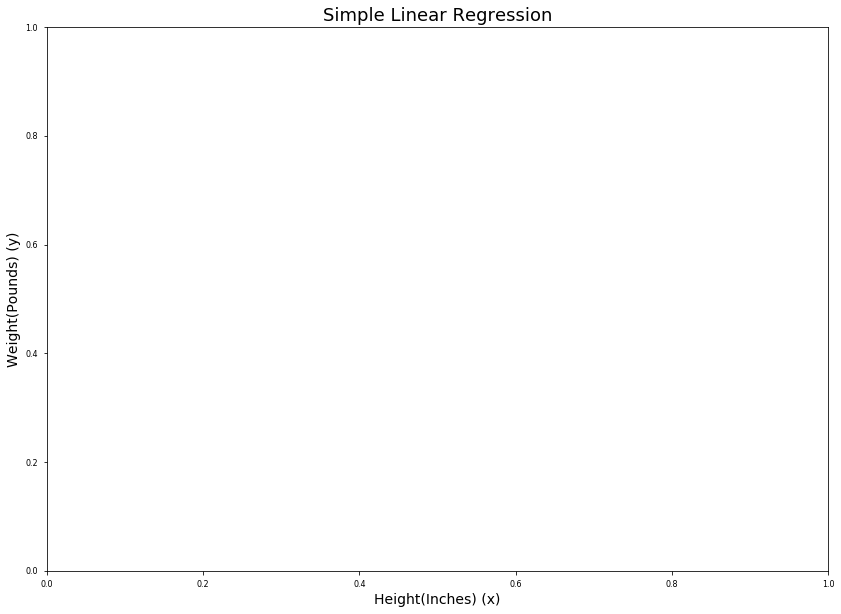

In [5]:
# TASK 3:
# TODO: Plot a scatter plot for all the values of the dataset
# TODO: Plot a regression line from the equation coefficients above

fig = plt.figure(figsize=(14,10))

# TODO: Plot a scatter plot from x and y values



# TODO: Compute x2 and y2 using the coefficients computed above
# x2 =
# y2 = 

plt.plot(x2, y2, color='m')    

plt.title('Simple Linear Regression', fontsize=18)
plt.ylabel("Weight(Pounds) (y)",fontsize=14)
plt.xlabel("Height(Inches) (x)",fontsize=14)

plt.show()

That plot gives us a good visualization of the linear regression model we've designed. This was a simple and naive approach to building our first machine learning model. Now, let's have a look at how we can do the same using Python's `sklearn` module in **Exercise 2**.

<br/>

### Exercise 2: Diab-At-Ease

The **Diabetes Dataset** (featured below) contains ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

A detailed description can be found **[here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst)**. We don’t use the dataset directly provided in sklearn.

In [6]:
# Reading the dataset 
# Yes, we can also read a csv directly off a website through Pandas
df_diabetes = pd.read_csv('http://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt', delimiter='\t')
df_diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


1. Do some basic **statistical reconnaissance** of this data set and record your observations. You're also welcome to **visualise some of this data** to gain deeper insights into the relationships between variables.

For instance, try plotting a graph to determine the relationship between **BMI** and **Disease Progression**, or **BP** and **Disease Progression**. 

In [7]:
# YOUR ANSWER HERE





Here,

`Y = Disease Progression Values (also called “target” data in python)`

and

`X = All Other Features (or independent variables)`

We will use these to fit a **Linear Regression Model** and predict the quantitative value for disease progression. We will use the **Least Squares** method as the way to estimate the coefficients.

<br/>

The first step is to create a train-test split from the dataset. This is important because -

* When we’re using a statistical model (like Linear Regression, for example), we usually fit the model on a training set, in order to make predictions on a data that wasn’t used for training (test data).

* Doing this prevents **'overfitting'** in the model. 

* **Overfitting** occurs when the statistical model overreacts to minor fluctuations in the training data, and as a result has poor predictive performance on previously unseen data. **Underfitting** occurs when the model cannot capture the underlying trend of the data satisfactorily, and as a result such a model also has poor predictive performance on test data.

<img src='./test-train.png'>

Hence, we need to split our dataset into training and testing sets (usually a 70:30 split) to prevent our model from overfitting or underfitting on the given data.

<br/>

1. Create a train-test split from the given titanic dataset. Explore the shape and columns in these slices, and describe your observations. 

In [8]:
# YOUR ANSWER HERE



#### Creating a Linear Regression Model

Now, we can use the sklearn module to create a **Linear Regression** object.

In [9]:
from sklearn.linear_model import LinearRegression
# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a Linear Regression Object?

| Object Method | Description |
| --- |:---:|
| `lm.fit()` | **Fit a linear model.** |
| `lm.predict()` | **Predict Y using the linear model with estimated coefficients** |
| `lm.score()` | **Returns the coefficient of determination (R<sup>2</sup>)** |
| `lm.coef_`  |	**Returns estimated coefficients.** |
| `lm.intercept_`  |	**Returns estimated intercept.** |

where, **R<sup>2</sup>** is a measure of correctness of observed outcomes replicated by the model, as the ratio of total outcomes explained by the model.

2. Use the above table to fit the Linear Regression model `lm` to our **test data** [`lm.fit()`] and then use it to make predictions [`lm.predict()`] on the **train data**. 

In [10]:
# YOUR ANSWER HERE



3. Use the `lm.score()` method to find out the accuracy of our Linear Regression Model. 

In [11]:
# YOUR ANSWER HERE

